# Pengantar
Kamu telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe milikmu bisa dibilang cukup unik karena kamu "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, tetapi membutuhkan modal yang besar. Oleh karena itu, kamu dan para mitra memutuskan untuk menarik minat investor agar mau berinvestasi. Mereka tertarik dengan kondisi pasar saat ini—tetapi, apakah kamu bisa mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?

Mengingat kamu adalah seorang pakar analisis, para mitra pun memintamu untuk mempersiapkan sejumlah riset pasar. Kamu memiliki data open-source terkait jenis-jenis usaha tempat makan di LA.

**Tabel rest_data:**
* object_name — nama usaha
* chain — usaha berbasis waralaba (TRUE/FALSE)
* object_type — jenis usaha
* address — alamat
* number — jumlah kursi

# Tujuan



# Tahapan-tahapan

## Eksplorasi Data 

In [27]:
# mengimport library yang akan digunakan

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [28]:
#import data
try:
    rest = pd.read_csv('/datasets/rest_data_us.csv')
except:
    rest = pd.read_csv('rest_data_us.csv')
    
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [29]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [30]:
rest.duplicated().sum()

0

setelah dilakukan pengecekan didapatkan bahwa dataframe yang dimiliki mempunyai 9651 baris dengan 6 kolom, adapun kesimpulain lainnya adalah sebagai berikut:
1. nilai yang hilang pada kolom chain
2. tidak terdapat nilai duplikat pada dataframe
3. kolom id bisa diubah menjadi string agar lebih sesuai dengan id pada biasanya

## Pra-pemrosesan data

In [31]:
#menghapus baris yang kosong dikarenakan jumlah baris kosong sedikit
rest = rest.dropna()

In [32]:
#mengubah kolom id menjadi tipe string
rest['id'] = rest['id'].astype('str')

#rest['chain'] = rest['chain'].astype('bool')

In [33]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   object
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 527.6+ KB


Pada tahap ini kita telah melakukan pembersihan data dari nilai kosong dan membenarkan tipe data dengan tipe yang sesuai

## Analisis data

### proporsi dari berbagai jenis usaha



In [34]:
rest['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [35]:
rest_grouped = rest['object_type'].value_counts().reset_index()
rest_grouped['ratio'] = rest_grouped['count']/rest_grouped['count'].sum()*100

rest_grouped


,object_type,count,ratio
0,Restaurant,7253,75.176202
1,Fast Food,1066,11.048922
2,Cafe,435,4.508706
3,Pizza,319,3.306385
4,Bar,292,3.026534
5,Bakery,283,2.933250


[Text(0, 0, 'Restaurant'),
 Text(1, 0, 'Fast Food'),
 Text(2, 0, 'Cafe'),
 Text(3, 0, 'Pizza'),
 Text(4, 0, 'Bar'),
 Text(5, 0, 'Bakery')]

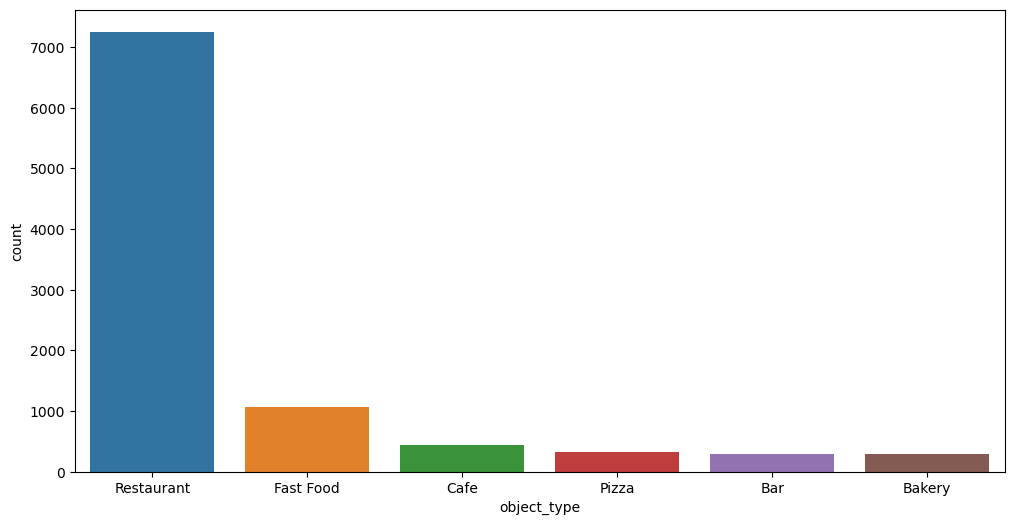

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x= rest_grouped['object_type'], y= rest_grouped['count'], ax=ax )
labels = ax.get_xticklabels()
ax.set_xticklabels(labels,)

([<matplotlib.patches.Wedge at 0x1c9e0fa7550>,
 [Text(-0.7821113422515211, 0.7734997403500045, 'Restaurant'),
  Text(0.3856311566947715, -1.03018862883758, 'Fast Food'),
  Text(0.8241838371888488, -0.7285060071932594, 'Cafe'),
  Text(0.9765378360813136, -0.5063337384587618, 'Pizza'),
  Text(1.0573485269279743, -0.3033382478409921, 'Bar'),
  Text(1.0953328885447873, -0.10122185175214231, 'Bakery')],
 [Text(-0.4266061866826478, 0.42190894928182054, '75.2%'),
  Text(0.21034426728805716, -0.5619210702750435, '11.0%'),
  Text(0.4495548202848266, -0.3973669130145051, '4.5%'),
  Text(0.5326570014988983, -0.2761820391593246, '3.3%'),
  Text(0.5767355601425314, -0.1654572260950866, '3.0%'),
  Text(0.5974543028426113, -0.055211919137532164, '2.9%')])

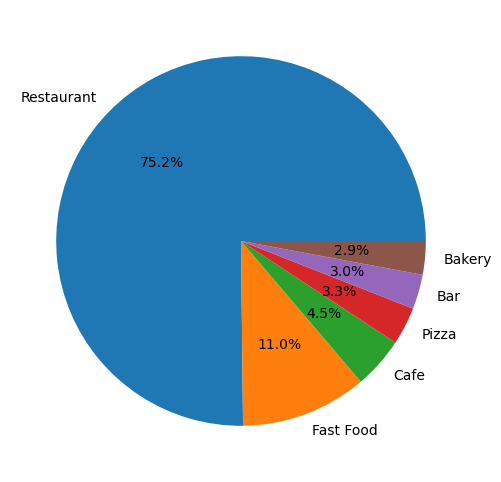

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
#ax.pie(sizes, labels=labels)
ax.pie(rest_grouped['ratio'], labels=rest_grouped['object_type'], autopct='%1.1f%%')

ternyata pada dataframe yang dipunyya, jenis restaurant mendominasi 75,2% dibandingkan dengan seluruh jenis usaha lain

### proporsi dari usaha berbasis waralaba dan nonwaralaba

In [38]:
grouped_chain = rest.groupby('chain').count()
grouped_chain

,id,object_name,address,object_type,number
chain,,,,,
False,5972,5972,5972,5972,5972
True,3676,3676,3676,3676,3676


[Text(0, 0, 'non-chain'), Text(1, 0, 'chain')]

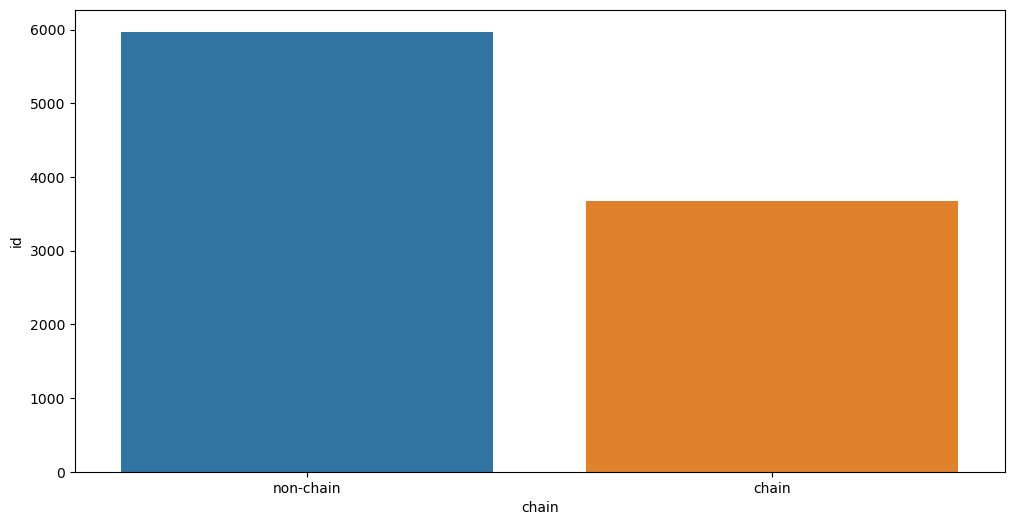

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x= grouped_chain.index, y= grouped_chain['id'], ax=ax )
labels = ax.get_xticklabels()
ax.set_xticklabels(['non-chain','chain'])

didata frame ini kita mendapati bahwa jenis usaha yang bukan waralaba lebih banyak daripada jenis usaha waralaba

### Jenis usaha yang biasanya merupakan usaha berbasis waralaba

In [40]:
grouped_chain_object = rest.pivot_table(values= 'object_name',
                                       index= 'object_type',
                                       columns= 'chain',
                                       aggfunc= 'count')
grouped_chain_object = grouped_chain_object.fillna(0)
grouped_chain_object['ratio'] = grouped_chain_object[True]/(grouped_chain_object[True] + grouped_chain_object[False])
grouped_chain_object

chain,False,True,ratio
object_type,,,
Bakery,0.0,283.0,1.000000
Bar,215.0,77.0,0.263699
Cafe,169.0,266.0,0.611494
Fast Food,461.0,605.0,0.567542
Pizza,166.0,153.0,0.479624
Restaurant,4961.0,2292.0,0.316007


<Axes: ylabel='object_type'>

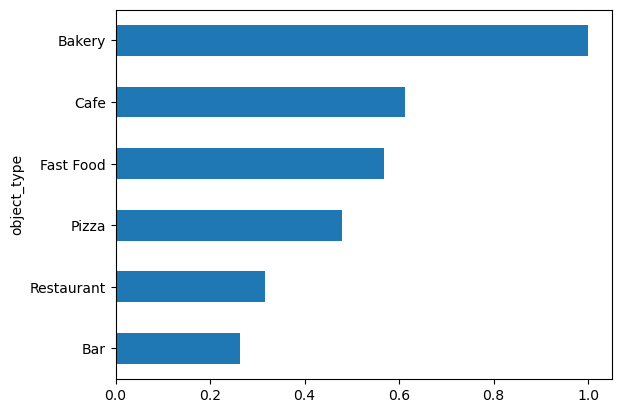

In [41]:
grouped_chain_object['ratio'].sort_values(ascending=True).plot(kind='barh')

**Kesimpulan**

Berdasarkan basis waralabanya, tipe usaha Bakery merupakan tipe usaha yang sepenuhnya berbasis waralaba

### ciri-ciri dari jenis usaha berbasis waralaba

In [42]:
a = rest.groupby(['chain']).agg({'number' : 'sum', 'id' : 'count'})
a['ratio'] = a['number'] / a['id']
a = a.rename(index={False : "non-chain" , True : 'chain'})
a.reset_index()

,chain,number,id,ratio
0,non-chain,275736,5972,46.171467
1,chain,145916,3676,39.694233


<Axes: title={'center': 'Ratio Jumlah Kursi terhadap jumlah tempat'}, xlabel='chain'>

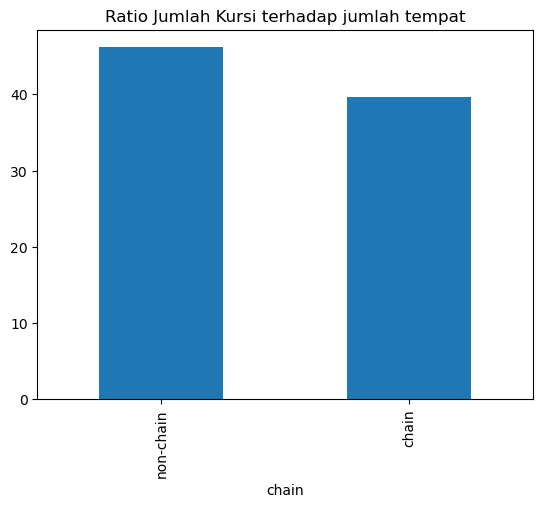

In [43]:
a['ratio'].plot(kind='bar', title='Ratio Jumlah Kursi terhadap jumlah tempat')

**Kesimpulan**

ciri selanjutnya dari jenis usaha waralaba berdasarkan jumlah kursi dan jumlah tempat adalah jenis usaha berbasis waralaba cenderung memiliki banyak tempat/outlet tetapi dengan jumlah kursi yang sedikit

### jumlah rata-rata kursi untuk setiap jenis usaha

In [44]:
rest.groupby('object_type').agg(kursi_rata_rata = ('number','mean'))\
.sort_values(by='kursi_rata_rata', ascending=False)

,kursi_rata_rata
object_type,
Restaurant,48.048807
Bar,44.767123
Fast Food,31.837711
Pizza,28.545455
Cafe,25.000000
Bakery,21.773852


<Axes: ylabel='object_type'>

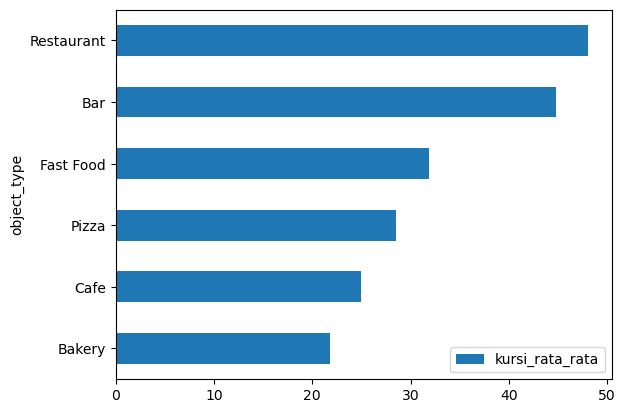

In [45]:
rest.groupby('object_type').agg(kursi_rata_rata = ('number','mean'))\
.sort_values(by='kursi_rata_rata').plot(kind='barh')

**Kesimpulan**

Jika dilihat dari jumlah rata-rata kursi, jenis usaha restaurant dan bar merupakan jenis usaha yang memiliki jumlah kursi yang lebih banyak dibandingkan jenis usaha lain. Kemungkinan ini disebabkan oleh perilaku masyarakat pada kota ini yang lebih menyukai restaurant dan bar untuk dijadikan tempat berkumpul dengan keluarga atau rekan kerja

### Pindahkan data nama jalan dari kolom address ke kolom terpisah

In [46]:
rest['address_fix'] = rest['address'].apply(lambda x : ' '.join(x.split(' ')[1:])).to_frame()
rest

,id,object_name,address,chain,object_type,number,address_fix
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


### Membuat grafik yang menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan)

In [47]:
rest_address_top = rest.groupby('address_fix')['id'].count().reset_index()
rest_address_top_final = rest_address_top.sort_values(by='id', ascending=False).head(10)
rest_address_top_final

,address_fix,id
2680,W SUNSET BLVD,296
2611,W PICO BLVD,288
581,HOLLYWOOD BLVD,167
2826,WILSHIRE BLVD,161
1703,S VERMONT AVE,148
1914,SANTA MONICA BLVD,146
2164,W 3RD ST,145
147,BEVERLY BLVD,135
1294,S FIGUEROA ST,134
754,MELROSE AVE,128


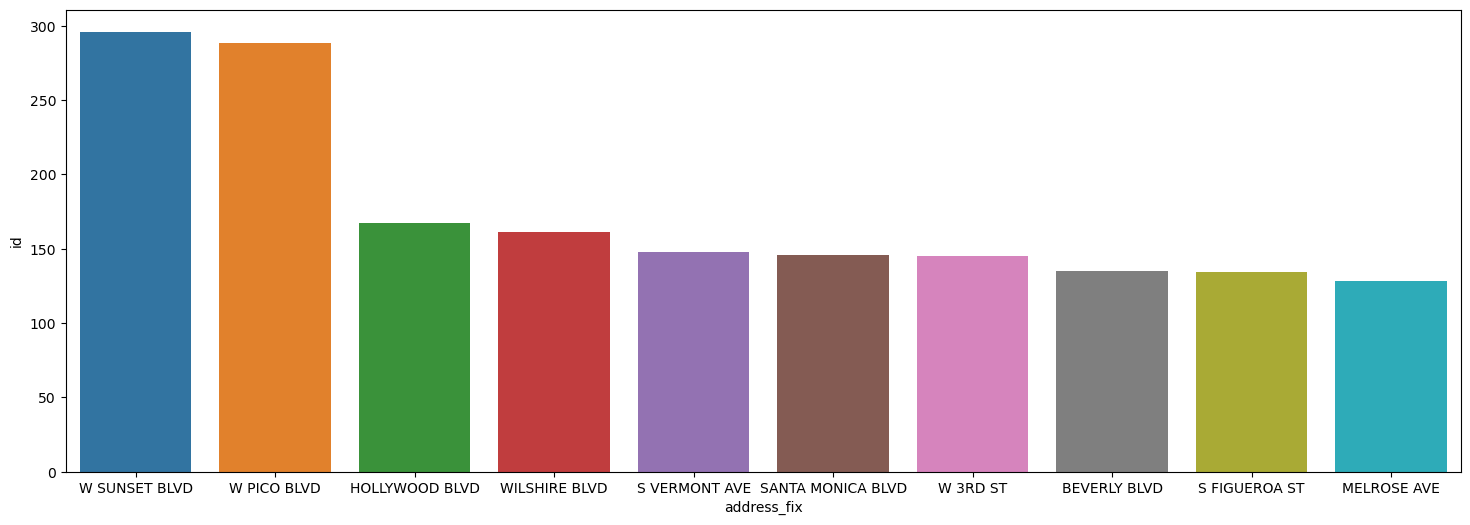

In [48]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(x= rest_address_top_final['address_fix'],y= rest_address_top_final['id'], ax=ax)
plt.show()

jalan W SUNSET BLVD dan W PICO BLVD menduduki top 2 jalan yang memiliki jumlah usaha terbanyal

### Temukan jumlah jalan yang hanya memiliki satu usaha (tempat makan)

In [49]:
rest_1_type = rest.groupby('address_fix')['object_type'].nunique().reset_index()
rest_1_type.loc[rest_1_type['object_type'] == 1]

,address_fix,object_type
0,1/2 3RD ST,1
1,1/2 7TH ST,1
2,1/2 BEVERLY BLVD,1
3,1/2 CITY TERRACE DR,1
4,1/2 COLORADO BLVD,1
...,...,...
3070,YORK BLVD B,1
3071,YOSEMITE DR,1
3073,Z00 DR,1
3075,ZOO DR,1


In [50]:
#jalan keselruhan
rest['address_fix'].nunique()

3077

terdapat sekitar 2736 jalan yang hanya memiliki 1 usaha di jalan tersebut dari total jalan yang dipunya sebesar 3077 jalan. ini artinya sekitar 80% jenis usaha terpusat di jalan-jalan besar


### distribusi jumlah kursi di jalan yang banyak usaha

In [36]:
# memfilter data berdasarkan usaha yang berada di jalan W SUNSET BLVD

rest_pr = rest[rest['address_fix'].str.contains("W SUNSET BLVD")]
rest_pr

,id,object_name,address,chain,object_type,number,address_fix
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,W SUNSET BLVD #A
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118,W SUNSET BLVD
33,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35,W SUNSET BLVD
...,...,...,...,...,...,...,...
9498,21284,PA ORD EXPRESS,5301 W SUNSET BLVD # 11,False,Fast Food,31,W SUNSET BLVD # 11
9523,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,False,Restaurant,29,W SUNSET BLVD
9527,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,False,Pizza,20,W SUNSET BLVD
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1,W SUNSET BLVD


<AxesSubplot:title={'center':'persebaran kursi pada jalan W SUNSET BLVD'}, ylabel='Frequency'>

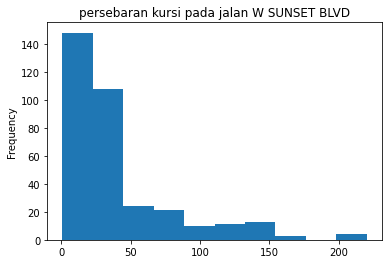

In [33]:
#melihat persebaran kursi yang ada dijalan W SUNSET BLVD
rest_pr['number'].plot(kind ='hist', title='persebaran kursi pada jalan W SUNSET BLVD')

ternyata mayoritas jenis usaha di jalan W SUNSET BLVD memiliki kursi sekitar 0-48 setiap jenis usaha. mungkin dengan adanya data ini jikalau kita akan membuka jenis usaha di jalan ini kita cukup menyediakan sekitar 45 kursi saja

<AxesSubplot:title={'center':'persebaran kursi pada jalan W PICO BLVD'}, ylabel='Frequency'>

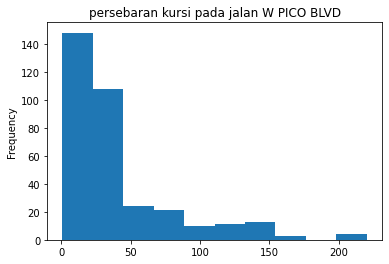

In [34]:
rest_pr = rest[rest['address_fix'].str.contains("W PICO BLVD")]
rest_pr
rest_pr['number'].plot(kind ='hist', title='persebaran kursi pada jalan W PICO BLVD')

sama seperti di jalan sebelumnya, begitupula usaha yang berada di W PICO BLVD kebanyakan menyediakan kursi sebanyak 0- 47 kursi 

# Kesimpulan 

Berdasarkan data-data yang kita analisis, data tersebut memuat tentang jenis-jenis usaha tempat makan di LA. Jika kita memiliki rencana membuka cafe dengan konsep baru, yaitu "memperkerjakan" robot sebagai pelayan atau pramusaji tentu ini adalah hal yang akan menarik perhatian publik. 

Melihat data-data yang telah dianalisis kita mendapati bahwa persaingan di bidang Cafe masih sungguh kecil dikarenakan mayoritas sebesar 75% jenis usaha di LA bersaing di bidang Restaurant dan persaingan di bidang Cafe masih sebesar 4% maka kemungkinan besar dengan konsep baru yang kita tawarkan dapat menarik perhatian pengunjung dibandingkan konsep Cafe yang reguler.

Kita dapat membuka Cafe ini di jalan-jalan besar mengingat bahwa berdasarkan data yang kita analisis sekitar 80% jenis usaha ini terpusat di jalan-jalan besar dan sebagai permulaan kita bisa menyediakan sekitar 25-30 kursi dan kita bisa menambah jumlah kursi dengan seiring berjalannya peningkatan pengunjung.

Presentasi <https://drive.google.com/file/d/1rLyK8R6OB4uCT0qQ82e_DxiYnSeZ-Skc/view?usp=drive_link>